In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

# TESTING TOOLS
from itertools import count
iteraciones = count(1)

def main():
    # load data --> eeg.shape = (224930, 63)
    eeg = pd.read_csv('../data/eeg.csv')

    # interactive plotting
    %matplotlib qt5
    plt.ion()




    sfreq = 0.01 # sampling frequency
    visible = 10 # time shown in plot (in samples) --> 4 seconds

    # define channels to plot
    ch1 = 'Fp2'
    ch2 = 'C3'

    # initialize deques
    dy1 = deque(np.zeros(visible), visible)
    dy2 = deque(np.zeros(visible), visible)
    dx = deque(np.zeros(visible), visible)

    # get interval of entire time frame #TODO: Solo se ajusta al ejemplo
    interval = np.linspace(0, eeg.shape[0], num=eeg.shape[0])#TODO: Revisar el fichero "first_email.ipynb" - en el ejemplo cada point step representa un 500Hz
    interval /= sfreq # from samples to seconds, NO ME DAN LOS NUMEROS





    ## Define figure limits | dejamos estáticos los límites del eje y - entre un min y un max
    ch1_min = eeg[ch1].min()
    ch1_max = eeg[ch1].max()
    ch2_min = eeg[ch2].min()
    ch2_max = eeg[ch2].max()






    # define figure size
    fig = plt.figure(figsize=(20,12))

    # define axis1, labels, and legend
    ah1 = fig.add_subplot(211)
    ah1.set_ylabel("Pressure [PSIg]", fontsize=14)
    l1, = ah1.plot(dx, dy1, color='rosybrown', label=ch1)
    ah1.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)

    # define axis2, labels, and legend
    ah2 = fig.add_subplot(212)
    ah2.set_xlabel("Time [min]", fontsize=14, labelpad=10)
    ah2.set_ylabel("Flow Rate [m3/h]", fontsize=14)
    l2, = ah2.plot(dx, dy2, color='silver', label=ch2)
    ah2.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)
    start = 0


    # simulate entire data
    while start+visible <= eeg.shape[0]:
        next(iteraciones)
        # extend deques (both x and y axes)
        dy1.extend(eeg[ch1].iloc[start:start+visible])
        dy2.extend(eeg[ch2].iloc[start:start+visible])
        dx.extend(interval[start:start+visible])

        # update plot
        l1.set_ydata(dy1)  
        l2.set_ydata(dy2)
        l1.set_xdata(dx)
        l2.set_xdata(dx)

        # get mean of deques
        # mdy1 = np.mean(dy1)
        # mdy2 = np.mean(dy2)

        # set x- and y-limits based on their mean
        ah1.set_ylim(ch1_min, ch1_max)
        ah2.set_ylim(ch2_min, ch2_max)
        try:
            ah1.set_xlim(interval[start], interval[start+visible])
        except:
            ah1.set_xlim(interval[start], interval[-1])
        
        try:
            ah2.set_xlim(interval[start], interval[start+visible])
        except:
            ah2.set_xlim(interval[start], interval[-1])

        # control speed of moving time-series
        start += 1

        fig.canvas.draw()
        fig.canvas.flush_events()
        
##%%timeit --> 11.7 s ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)   --> 287 rows

In [2]:
%%time

main()

CPU times: total: 13.9 s
Wall time: 16 s


In [4]:
print (iteraciones)

279


# Viernes 17/02 solución parte 2

Estudiar documentación oficial

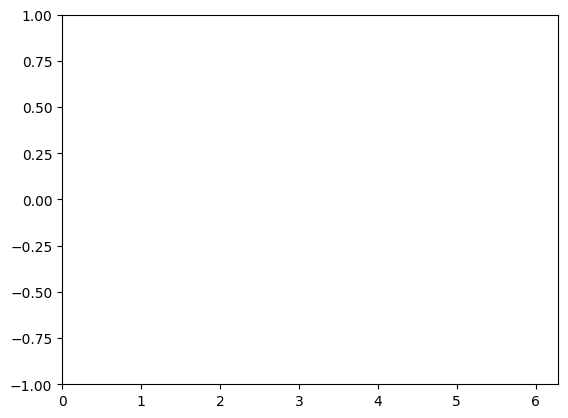

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
# plt.show()

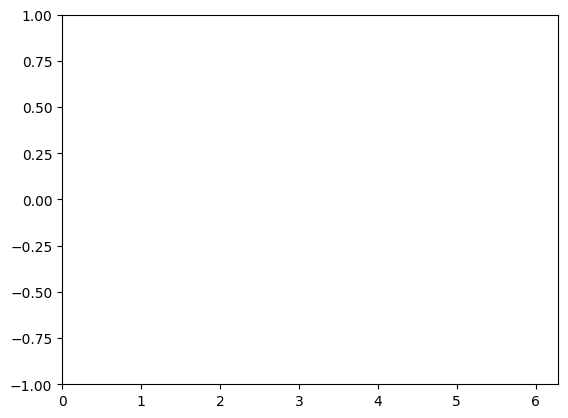

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from functools import partial

fig, ax = plt.subplots()
line1, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return line1,

def update(frame, ln, x, y):
    x.append(frame)
    y.append(np.sin(frame))
    ln.set_data(x, y)
    return ln,

ani = FuncAnimation(
    fig, partial(update, ln=line1, x=[], y=[]),
    frames=np.linspace(0, 2*np.pi, 128),
    init_func=init, blit=True)

# plt.show()

Observar grafico de linea animada: https://matplotlib.org/stable/gallery/animation/simple_anim.html

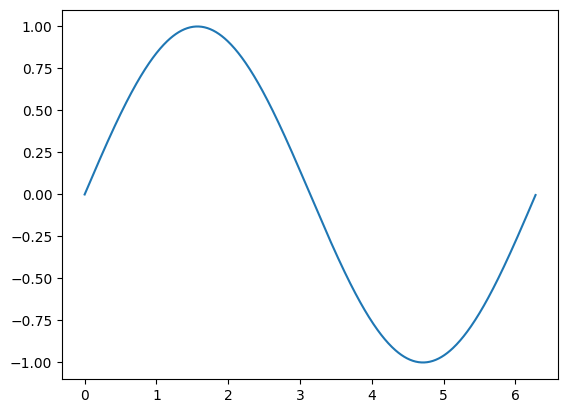

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.

# ani.save("movie.mp4")

# or

# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()